# **Bank Customer Churn Model**

### Our objective is to classify the bank customers who have the chances of leaving the bank(closing their account) by using proper machine learning model. Increase the performance of the model using proper data analysis, required encoding, preprocessing, handling the imbalance in data(target feature), standardizing the features and proper hyperparameter tuning.

## Data Source:
**The dataset used is taken from the dataset reposiratory of YBI-Foundation available on github.
The data set is called 'Bank Churn Modelling.csv' dataset.**

## Import Libraries

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Import Data

In [93]:
data = pd.read_csv('/kaggle/input/bank-churn-modelling-dataset/Bank_churn_modelling.csv')

## Describe Data and Data Visualization

In [94]:
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Analyze Data

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [96]:
data.isna().sum()

CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
Num Of Products     0
Has Credit Card     0
Is Active Member    0
Estimated Salary    0
Churn               0
dtype: int64

## Data Preprocessing

This shows that all the values in CustomerId field/feature are unique and can be used for unique identification of any tuple

In [97]:
data.duplicated('CustomerId').sum()

0

In [98]:
data = data.set_index('CustomerId')

In [99]:
data.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [100]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Since the values are not numeric we encode them using the following function.

In [101]:
data.replace({'Geography':{'France':2,'Germany':1,'Spain':0}},inplace=True)

In [102]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [103]:
data.replace({'Gender':{'Male':1,'Female':0}},inplace=True)

In [104]:
data['Num Of Products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

Number of 3 and 4 products are very less hence we club them into 2

In [105]:
data.replace({'Num Of Products':{1:0,2:1,3:1,4:1}},inplace=True)

In [106]:
data['Has Credit Card'].value_counts()

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [107]:
data['Is Active Member'].value_counts()

1    5151
0    4849
Name: Is Active Member, dtype: int64

In [108]:
data.loc[(data['Balance']==0),'Churn'].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

Above data shows that the customers with zero balance have substantial chances of leaving the bank i.e. Churn so we create another feature as Zero Balance.

In [109]:
data['Zero Balance'] = np.where(data['Balance']>0,1,0)

<Axes: >

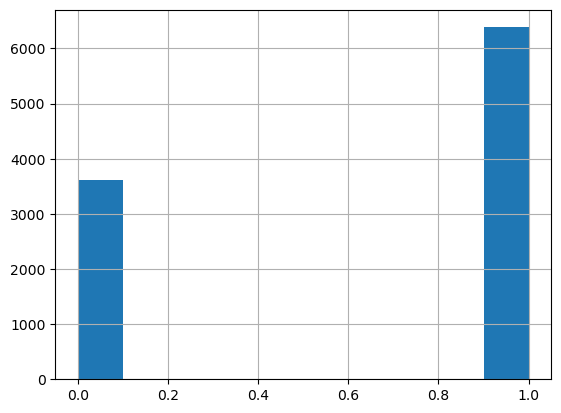

In [110]:
data['Zero Balance'].hist()

In [111]:
data.groupby(['Geography', 'Churn']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Geography Churn                                                        
0         0         2064         2064    2064  2064    2064     2064   
          1          413          413     413   413     413      413   
1         0         1695         1695    1695  1695    1695     1695   
          1          814          814     814   814     814      814   
2         0         4204         4204    4204  4204    4204     4204   
          1          810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Geography Churn                                                       
0         0                 2064             2064              2064   
          1                  413              413               413   
1         0                 1695             1695              1695   
          1                  814              814               814   
2         0                 4204             4204              4204   
          1                  810              810               810   

                 Estimated Salary  Zero Balance  
Geography Churn                                  
0         0                  2064          2064  
          1                   413           413  
1         0                  1695          1695  
          1                   814           814  
2         0                  4204          4204  
          1                   810           810

In [112]:
data.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn,Zero Balance
CustomerId,,,,,,,,,,,,,
15634602,Hargrave,619,2,0,42,2,0.00,0,1,1,101348.88,1,0
15647311,Hill,608,0,0,41,1,83807.86,0,0,1,112542.58,0,1
15619304,Onio,502,2,0,42,8,159660.80,1,1,0,113931.57,1,1
15701354,Boni,699,2,0,39,1,0.00,1,0,0,93826.63,0,0
15737888,Mitchell,850,0,0,43,2,125510.82,0,1,1,79084.10,0,1


In [113]:
Y = data['Churn']

### Selecting Target Variable and Feature Variable

Surname is does not participate in the prediction and Churn is the target feature so we drop them in X

In [114]:
X = data.drop(['Surname','Churn'],axis = 1)

In [115]:
X.shape, Y.shape

((10000, 11), (10000,))

In [116]:
data['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

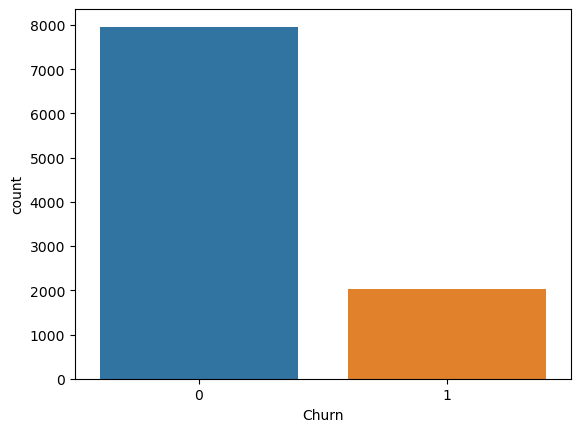

In [117]:
sns.countplot(x='Churn',data = data)

## Random Under Sampler

In [118]:
from imblearn.under_sampling import RandomUnderSampler

In [119]:
rus = RandomUnderSampler(random_state = 2529)

In [120]:
X_rus, Y_rus = rus.fit_resample(X,Y)

In [121]:
[[X_rus.shape, Y_rus.shape],[X.shape,Y.shape]]

[[(4074, 11), (4074,)], [(10000, 11), (10000,)]]

In [122]:
Y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [123]:
Y_rus.value_counts()

0    2037
1    2037
Name: Churn, dtype: int64

<Axes: ylabel='Frequency'>

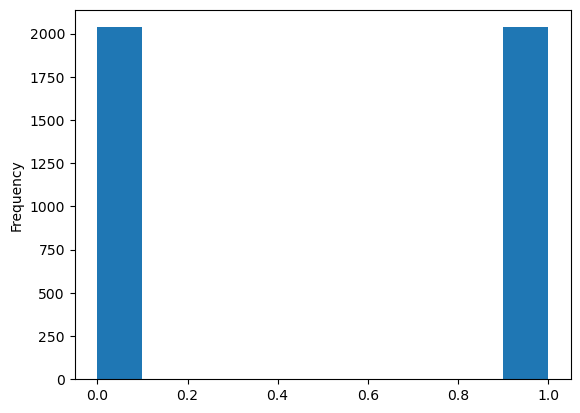

In [124]:
Y_rus.plot(kind='hist')

## Random Over Sampler

In [125]:
from imblearn.over_sampling import RandomOverSampler

In [126]:
ros = RandomOverSampler(random_state=2529)

In [127]:
X_ros, Y_ros = ros.fit_resample(X,Y)

In [128]:
[[X_ros.shape,Y_ros.shape],[X.shape,Y.shape]]

[[(15926, 11), (15926,)], [(10000, 11), (10000,)]]

In [129]:
Y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [130]:
Y_ros.value_counts()

1    7963
0    7963
Name: Churn, dtype: int64

<Axes: ylabel='Frequency'>

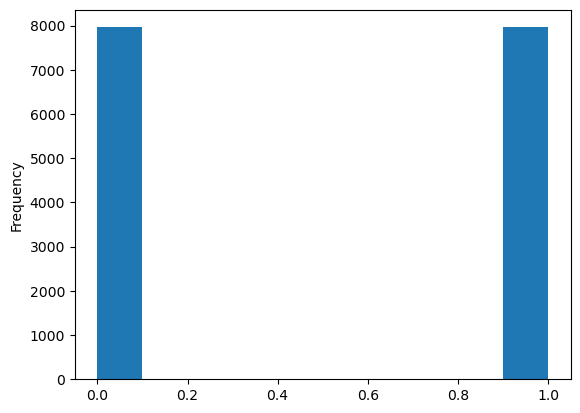

In [131]:
Y_ros.plot(kind='hist')

In [132]:
from sklearn.model_selection import train_test_split

### Splitting the actual data

In [133]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=2529)

### Splitting the Random Over Sampled Data

In [134]:
x_train_ros, x_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, Y_ros, test_size=0.3, random_state=2529)

### Splitting the Random Over Sampled Data

In [135]:
x_train_rus, x_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, Y_rus, test_size=0.3, random_state=2529)

### **Standardizing the Features**

In [136]:
from sklearn.preprocessing import StandardScaler

In [137]:
sc = StandardScaler()

In [138]:
x_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Zero Balance
CustomerId,,,,,,,,,,,
15771139,578,1,1,34,8,147487.23,1,1,0,66680.77,1
15713463,645,1,0,41,2,138881.04,0,1,0,129936.53,1
15570417,579,2,1,35,1,0.00,1,1,0,4460.20,0
15626243,618,2,1,30,3,133844.22,0,1,1,31406.93,1
15809178,569,1,0,42,9,146100.75,0,1,0,32574.01,1
...,...,...,...,...,...,...,...,...,...,...,...
15723028,778,2,1,33,1,0.00,1,1,0,85439.73,0
15759284,750,2,0,37,6,0.00,0,1,1,117948.00,0
15796218,814,1,1,29,1,131968.57,1,1,1,147693.92,1


### **Standardize the Original Data**

In [139]:
x_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [140]:
x_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

### **Standardize the Random Undersampled Data**

In [141]:
x_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [142]:
x_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

### **Standardize the Random Oversampled Data**

In [143]:
x_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [144]:
x_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

# **SVM Model**

In [145]:
from sklearn.svm import SVC

In [146]:
svm = SVC()

In [147]:
svm.fit(x_train,y_train)

SVC()

In [148]:
y_pred = svm.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

## **SVM Performance on Actual Data**

In [149]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [150]:
confusion_matrix(y_test, y_pred)

array([[2381,   33],
       [ 436,  150]])

In [151]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2414
           1       0.82      0.26      0.39       586

    accuracy                           0.84      3000
   macro avg       0.83      0.62      0.65      3000
weighted avg       0.84      0.84      0.81      3000



## SVM Model for Random Under Sampled Data

In [152]:
svm1 = SVC()

In [153]:
svm1.fit(x_train_rus,y_train_rus)

SVC()

In [154]:
y_pred_rus = svm1.predict(x_test_rus)

y_pred_rus.shape, y_test_rus.shape

((1223,), (1223,))

## **SVM Performance for Random Under Sampled Data**

In [155]:
confusion_matrix(y_test_rus, y_pred_rus)

array([[470, 157],
       [174, 422]])

In [156]:
print(classification_report(y_test_rus, y_pred_rus))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       627
           1       0.73      0.71      0.72       596

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



# **SVM Model for Random Over Sampled Data**

In [157]:
svm2 = SVC()

In [158]:
svm2.fit(x_train_ros,y_train_ros)

SVC()

In [159]:
y_pred_ros = svm2.predict(x_test_ros)

## **SVM Performance for Random Over Sampled Data**

In [160]:
confusion_matrix(y_test_ros, y_pred_ros)

array([[1823,  556],
       [ 626, 1773]])

In [161]:
print(classification_report(y_test_ros, y_pred_ros))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76      2379
           1       0.76      0.74      0.75      2399

    accuracy                           0.75      4778
   macro avg       0.75      0.75      0.75      4778
weighted avg       0.75      0.75      0.75      4778



## **Hyperparameter Tuning**

In [162]:
from sklearn.model_selection import GridSearchCV

In [163]:
param_grid = {'C': [0.1,1,10],
              'gamma': [1,0.1,0.01],
              'kernel': ['rbf'],
              'class_weight': ['balanced']}

In [164]:
grid = GridSearchCV(SVC(),param_grid,refit=True, verbose=2, cv=2)

In [165]:
grid.fit(x_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.9s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.9s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.0s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [166]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [167]:
grid_pred = grid.predict(x_test)

### Performance of SVM on Actual Data after Hyper Parameter Tuning

In [168]:
confusion_matrix(y_test, grid_pred)

array([[2159,  255],
       [ 343,  243]])

In [169]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      2414
           1       0.49      0.41      0.45       586

    accuracy                           0.80      3000
   macro avg       0.68      0.65      0.66      3000
weighted avg       0.79      0.80      0.79      3000



In [170]:
grid_rus = GridSearchCV(SVC(),param_grid,refit=True, verbose=2, cv=2)

In [171]:
grid_rus.fit(x_train_rus,y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [172]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [173]:
grid_pred_rus = grid_rus.predict(x_test_rus)

## Performance of SVM on Random Under Sampled Data after Hyperparameter Tuning

In [174]:
confusion_matrix(y_test_rus, grid_pred_rus)

array([[476, 151],
       [172, 424]])

In [175]:
print(classification_report(y_test_rus,grid_pred_rus))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75       627
           1       0.74      0.71      0.72       596

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



In [176]:
grid_ros = GridSearchCV(SVC(),param_grid,refit=True, verbose=2, cv=2)

In [177]:
grid_ros.fit(x_train_ros,y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.7s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.9s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.1s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.3s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.7s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [178]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [179]:
y_pred_ros = grid_ros.predict(x_test_ros)

## Performance of SVM on Random Over Sampled Data after Hyperparameter Tuning

In [180]:
confusion_matrix(y_test_ros, y_pred_ros)

array([[2047,  332],
       [  68, 2331]])

In [181]:
print(classification_report(y_test_ros, y_pred_ros))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2379
           1       0.88      0.97      0.92      2399

    accuracy                           0.92      4778
   macro avg       0.92      0.92      0.92      4778
weighted avg       0.92      0.92      0.92      4778



In [182]:
accuracy_score(y_test_ros,y_pred_ros)

0.9162829635830891

# Explanation

In this project we have used SVM(Support Vector Machine) to classify the bank customers into the customers who are likely to leave the bank(close their account) using the dataset available corresponding to it. We have analysed the data and have performed required data encoding, performed proper data preprocessing and also have handled the data imbalance for the corresponding class by using the techniques like Random Under Sampling and Random Over Sampling. We also compared the accuracy of the SVM model by using actual data, random oversampled data and random undersampled data which came to be similar. Finally we perfomed hyperparameter tuning for improving the model and then performed the same for all the three cases of dataset and found by analysing the results that the accuracy of SVM model after hyperparameter tuning which was trained using random oversampled data was maximum. Hence, we concluded that the model trained with random oversampled data and after hyperparameter tuning is most accurate and practical to be used for the task.